In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [18]:
print(x_train.shape)

(60000, 28, 28)


In [19]:
print(x_test.shape)

(10000, 28, 28)


In [20]:
X_valid, X_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [21]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/60
108/108 [==============================] - 1s 8ms/step - loss: 0.7007 - accuracy: 0.7597 - val_loss: 0.5041 - val_accuracy: 0.8228
Epoch 2/60
108/108 [==============================] - 1s 6ms/step - loss: 0.4391 - accuracy: 0.8467 - val_loss: 0.4140 - val_accuracy: 0.8568
Epoch 3/60
108/108 [==============================] - 1s 7ms/step - loss: 0.3930 - accuracy: 0.8620 - val_loss: 0.3660 - val_accuracy: 0.8720
Epoch 4/60
108/108 [==============================] - 1s 7ms/step - loss: 0.3653 - accuracy: 0.8690 - val_loss: 0.3797 - val_accuracy: 0.8622
Epoch 5/60
108/108 [==============================] - 1s 6ms/step - loss: 0.3486 - accuracy: 0.8745 - val_loss: 0.3542 - val_accuracy: 0.8728
Epoch 6/60
108/108 [==============================] - 1s 7ms/step - loss: 0.3278 - accuracy: 0.8818 - val_loss: 0.3344 - val_accuracy: 0.8816
Epoch 7/60
108/108 [==============================] - 1s 8ms/step - loss: 0.3105 - accuracy: 0.8876 - val_loss: 0.3262 - val_accuracy: 0.8838
Epoch 

In [27]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 0s 1ms/step - loss: 108.1641 - accuracy: 0.8510
[108.16407775878906, 0.8510000109672546]


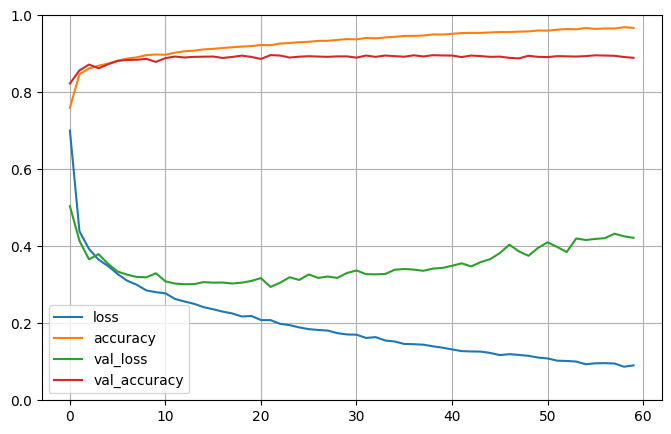

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 0s 997us/step


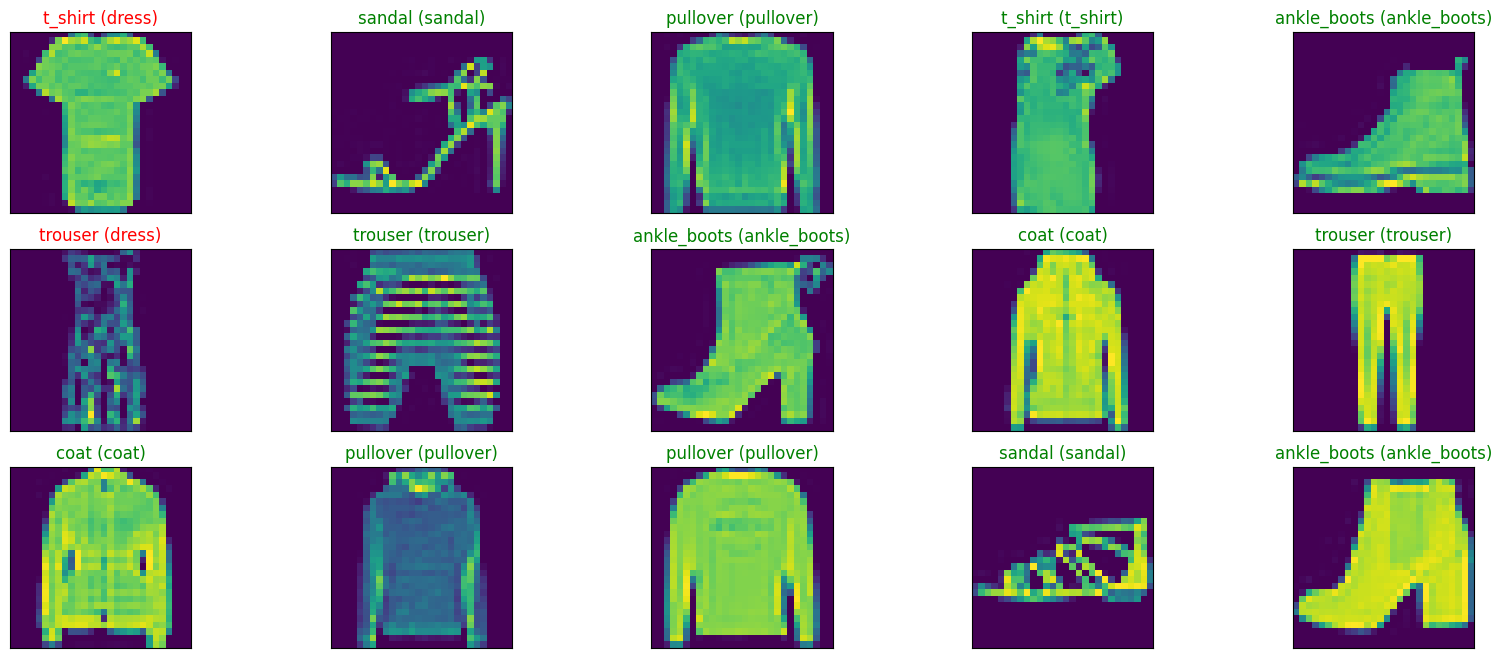

In [29]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))